#### Import Library & Load Data

In [26]:
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager
font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

import optuna
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score , mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from vecstack import StackingTransformer

In [27]:
data = pd.read_csv('./data/Elderly.csv')
data.shape

(1531, 12)

In [28]:
data.head()

,Gender,Age,Religion,Job,Married,Edu,Health,Self_conf,Earn,Activity,target,Cluster
0,0,73,3,1.0,3,0,1,1,0,0,1,1
1,0,79,2,2.0,1,1,2,1,0,3,5,3
2,1,77,3,1.0,1,0,2,1,2,0,3,0
3,0,72,1,2.0,3,0,2,1,0,0,1,3
4,0,72,2,1.0,3,1,1,1,0,0,1,0


#### EDA

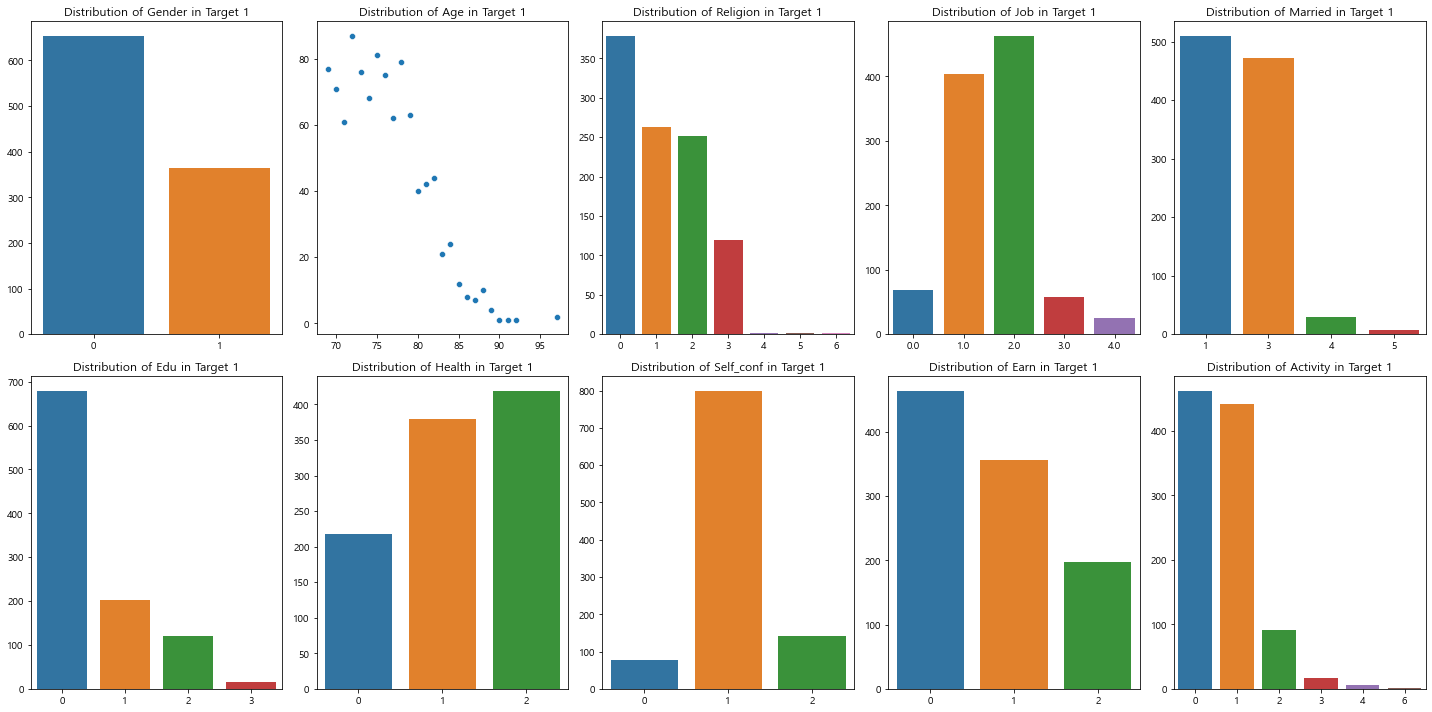

In [29]:
cols = data.drop(['target','Cluster'], axis=1).columns
temp = data[data['target']==1]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 1')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 1')

plt.tight_layout()
plt.show()

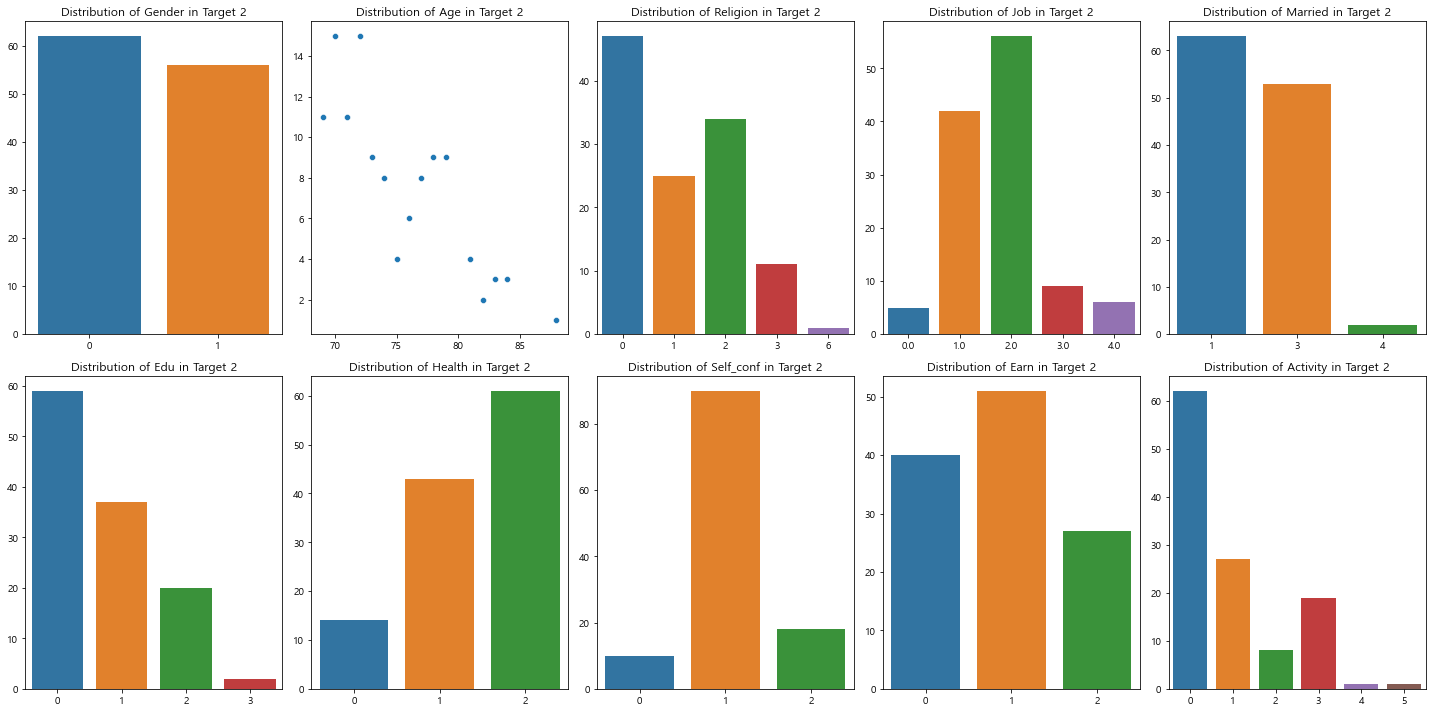

In [30]:
temp = data[data['target']==2]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 2')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 2')

plt.tight_layout()
plt.show()

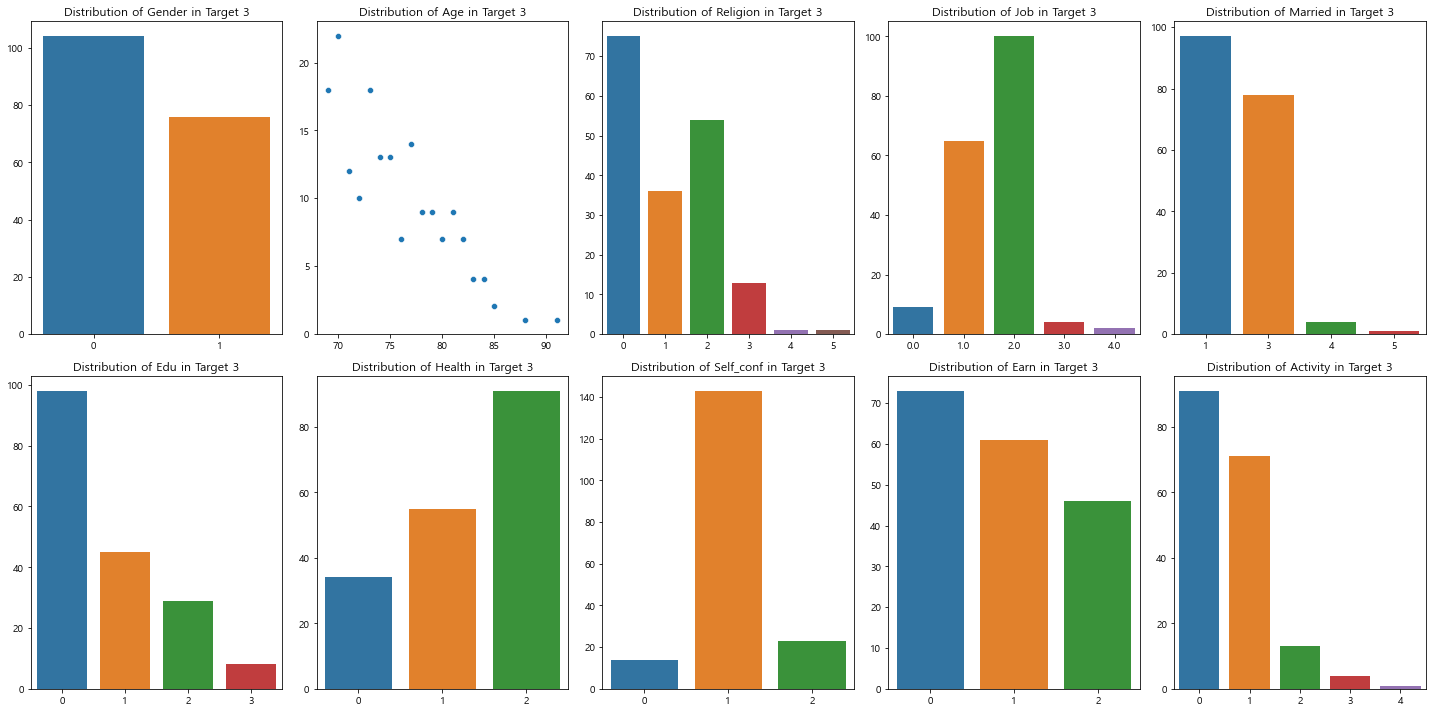

In [31]:
temp = data[data['target']==3]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 3')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 3')

plt.tight_layout()
plt.show()

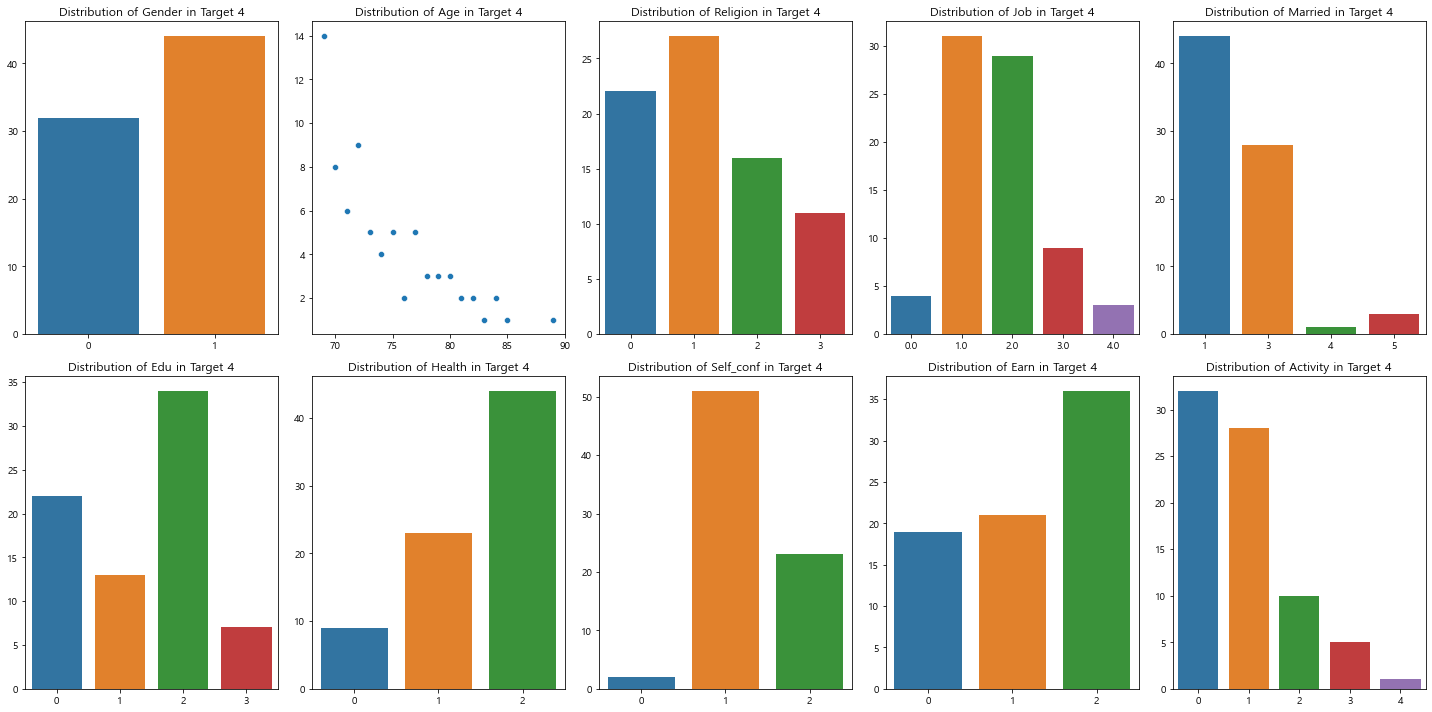

In [32]:
temp = data[data['target']==4]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 4')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 4')

plt.tight_layout()
plt.show()

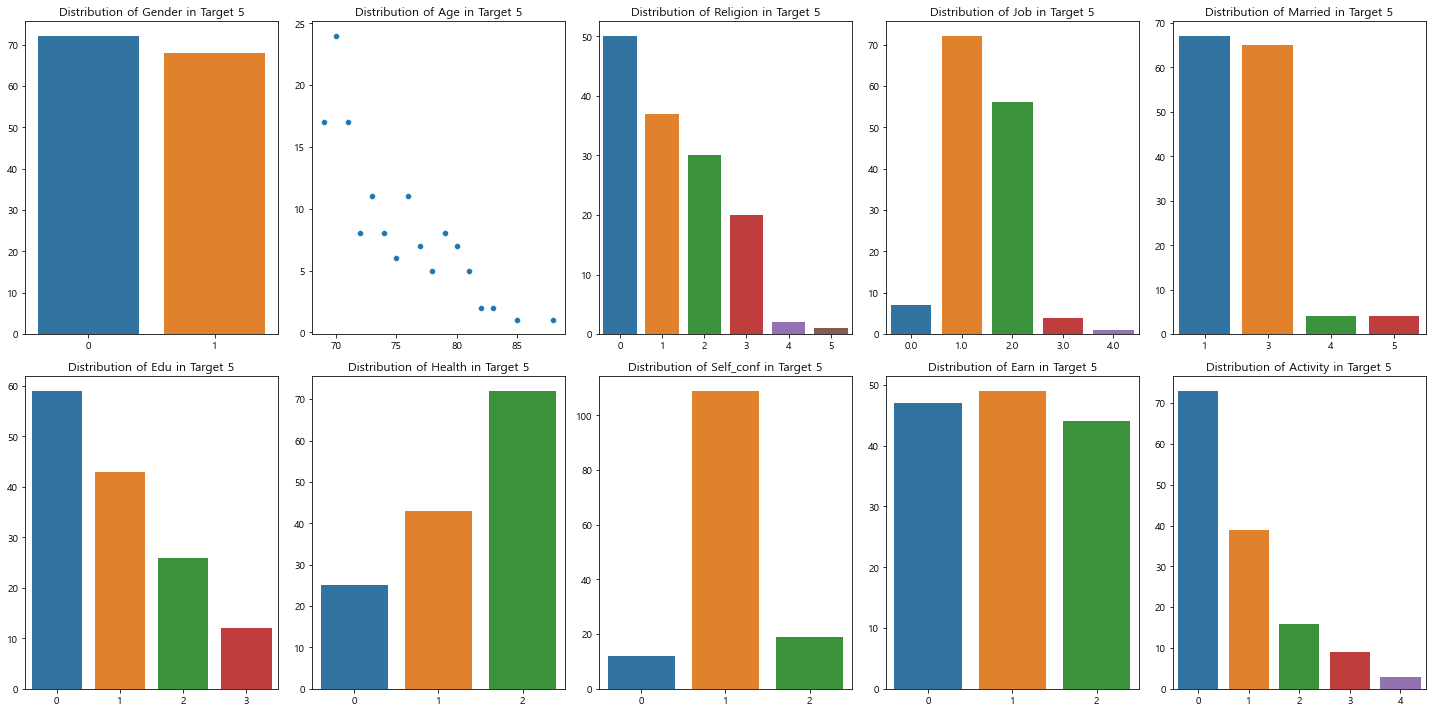

In [33]:
temp = data[data['target']==5]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 5')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 5')

plt.tight_layout()
plt.show()

#### Oversampling

In [34]:
X = data.drop(['target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2022)

In [35]:
y_train.value_counts()

1    813
3    144
5    112
2     94
4     61
Name: target, dtype: int64

In [36]:
oversampling_instance = SMOTE(random_state=2022)
o_X_train, o_y_train = oversampling_instance.fit_sample(X_train, y_train)
o_y_train.value_counts()

2    813
4    813
1    813
3    813
5    813
Name: target, dtype: int64

In [37]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_poly, y, stratify=y, test_size=0.2, random_state=2022)
lr = LogisticRegression(random_state=2022, multi_class='multinomial')
lr.fit(X_train_2, y_train_2)
pred = lr.predict(X_test_2)
print('Polynomial LogisticRegression: ',accuracy_score(pred, y_test_2))

o_X_train_2, o_y_train_2 = oversampling_instance.fit_sample(X_train_2, y_train_2)
lr = LogisticRegression(random_state=2022, multi_class='multinomial')
lr.fit(o_X_train_2, o_y_train_2)
pred = lr.predict(X_test_2)
print('Polynomial + SMOTE LogisticRegression: ',accuracy_score(pred, y_test_2))

Polynomial LogisticRegression:  0.6644951140065146


MemoryError: Unable to allocate 1.76 GiB for an array with shape (669, 352715) and data type float64

In [ ]:
lr = LogisticRegression(random_state=2022, multi_class='multinomial')
lr.fit(o_X_train, o_y_train)
pred = lr.predict(X_test)
accuracy_score(pred, y_test)

0.30787589498806683

#### Modeling

In [ ]:
# RandomSearch Tuning
tuned_models = []

clfs = [
(RandomForestClassifier(random_state=2022, n_jobs=-1),
    {'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 70, 90, 110],
    'max_depth': [3, 5, 7,10],
    'max_features': [0.8,0.85,0.9]}
),
(LGBMClassifier(random_state=2022, objective='multiclass', n_jobs=-1),
    {'learning_rate': np.arange(0.1, 0.6, 0.1),
        'n_estimators': [100,125,150,175,200],
        'max_depth': [3,5,7,9],
        'min_child_weight': [3,8,13],
        'subsample': [0.75,0.85,0.95]}
),
(XGBClassifier(random_state=2022),
    {'learning_rate': [0.05,0.35,0.65,1.0],
        'n_estimators': [100,125,150,175,200],
        'max_depth': [3,5,7,9],
        'min_child_weight': [3,8,13],
        'subsample': [0.75, 0.85, 0.95],
        'gamma': [0,2,4]}
),
(CatBoostClassifier(random_seed=2022),
    {'learning_rate': [0.05, 0.35, 0.65, 1.0],
    'n_estimators': [100,125,150,175,200],
    'max_depth':[3,5,7,9]}
),
(LogisticRegression(random_state=2022, multi_class='multinomial'),
    {'C': [100, 10, 1, 0.1, 0.01],
    'penalty':['none', 'l1', 'l2', 'elasticnet']}
)
]

for clf, param_grid in tqdm(clfs):
    rs = RandomizedSearchCV(clf, param_distributions = param_grid, scoring='accuracy', n_iter=30, random_state=2022, n_jobs=-1)
    scores = cross_val_score(rs, o_X_train, o_y_train, scoring='accuracy', cv = 5, n_jobs=-1)
    clf_name = type(clf).__name__
    clf_score = max(scores)

    print(f'모델: {clf_name:30} 성능: {clf_score}')
    
    tuned_models.append((clf_name, rs, clf_score))

 20%|██        | 1/5 [06:36<26:26, 396.67s/it]

모델: RandomForestClassifier         성능: 0.7572533849129593


 40%|████      | 2/5 [08:36<11:41, 233.84s/it]

모델: LGBMClassifier                 성능: 0.8143133462282398


 60%|██████    | 3/5 [22:54<17:17, 518.85s/it]

모델: XGBClassifier                  성능: 0.8191489361702128


 80%|████████  | 4/5 [29:02<07:39, 459.14s/it]

모델: CatBoostClassifier             성능: 0.8268858800773694


100%|██████████| 5/5 [29:12<00:00, 350.51s/it]

모델: LogisticRegression             성능: 0.33268858800773693


In [24]:
bayesian_tuned = []

In [25]:
# Bayesian Tuning of RandomForest

def objective(trial):
      
    rf_n_estimators = trial.suggest_int("n_estimators", 50, 150)
    rf_max_depth = trial.suggest_int("max_depth", 2, 10, log=True)
    rf_max_features = trial.suggest_float("max_features", 0.6, 0.95)
    rf_criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    

    classifier_obj = RandomForestClassifier(n_estimators=rf_n_estimators, 
                                            max_depth=rf_max_depth,
                                            max_features=rf_max_features,
                                            criterion=rf_criterion,
                                            n_jobs=-1, 
                                            random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, o_X_train, o_y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = RandomForestClassifier(**study.best_params, n_jobs=-1, random_state=2020)
scores = cross_val_score(model, o_X_train, o_y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-17 16:43:13,275] A new study created in memory with name: no-name-2f2f26be-e72b-4015-92c2-5e44eff2b821
[I 2022-05-17 16:43:20,208] Trial 0 finished with value: 0.4698259142465143 and parameters: {'n_estimators': 100, 'max_depth': 5, 'max_features': 0.9284772772384489, 'criterion': 'entropy'}. Best is trial 0 with value: 0.4698259142465143.
[I 2022-05-17 16:43:24,873] Trial 1 finished with value: 0.46247491853011813 and parameters: {'n_estimators': 79, 'max_depth': 5, 'max_features': 0.937035427174234, 'criterion': 'gini'}. Best is trial 0 with value: 0.4698259142465143.
[I 2022-05-17 16:43:26,787] Trial 2 finished with value: 0.35919014388024106 and parameters: {'n_estimators': 95, 'max_depth': 3, 'max_features': 0.6013765524887179, 'criterion': 'entropy'}. Best is trial 0 with value: 0.4698259142465143.
[I 2022-05-17 16:43:32,899] Trial 3 finished with value: 0.6783361347958403 and parameters: {'n_estimators': 150, 'max_depth': 9, 'max_features': 0.916971520050089, 'criteri

KeyboardInterrupt: 

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
# Bayesian Tuning of LGBM

def objective(trial):
    
    lgb_n_estimators = trial.suggest_int("n_estimators", 100, 200)
    lgb_max_depth = trial.suggest_int("max_depth", 2, 10)
    lgb_min_child_weight = trial.suggest_int("min_child_weight", 2, 15)
    lgb_learning_rate = trial.suggest_float('learning_rate', 0.05, 0.8)
    lgb_subsample = trial.suggest_float("subsample", 0.7, 0.95)
    

    classifier_obj = LGBMClassifier(n_estimators=lgb_n_estimators, 
                                    max_depth=lgb_max_depth,
                                    min_child_weight=lgb_min_child_weight,
                                    learning_rate=lgb_learning_rate,
                                    subsample = lgb_subsample,
                                    objective = 'multiclass'
                                    n_jobs=-1, 
                                    random_state=2022)

    skf = StratifedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, o_X_train, o_y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = RandomForestClassifier(**study.best_params, n_jobs=-1, random_state=2020)
scores = cross_val_score(model, o_X_train, o_y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
# Bayesian Tuning of XGB

def objective(trial):
    
    xgb_n_estimators = trial.suggest_int("n_estimators", 100, 200)
    xgb_max_depth = trial.suggest_int("max_depth", 2, 10)
    xgb_min_child_weight = trial.suggest_int("min_child_weight", 2, 15)
    xgb_learning_rate = trial.suggest_float('learning_rate', 0.05, 0.8)
    xgb_subsample = trial.suggest_float("subsample", 0.7, 0.95)
    xgb_gamma = trial.suggest_int('gamma', 0, 5)
    

    classifier_obj = XGBClassifier(n_estimators=xgb_n_estimators, 
                                    max_depth=xgb_max_depth,
                                    min_child_weight=xgb_min_child_weight,
                                    learning_rate=xgb_learning_rate,
                                    subsample = xgb_subsample,
                                    gamma = xgb_gamma
                                    random_state=2022)

    skf = StratifedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, o_X_train, o_y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = RandomForestClassifier(**study.best_params, n_jobs=-1, random_state=2020)
scores = cross_val_score(model, o_X_train, o_y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
# Bayesian Tuning of Catboost

def objective(trial):
      
    cat_n_estimators = trial.suggest_int("n_estimators", 100, 200)
    cat_max_depth = trial.suggest_int("max_depth", 2, 10)
    cat_learning_rate = trial.suggest_float("learning_rate", 0.05, 0.8)

    classifier_obj = CatBoostClassifier(n_estimators=cat_n_estimators, 
                                    max_depth=cat_max_depth,
                                    min_learning_rate=cat_learning_rate,
                                    n_jobs= -1,
                                    random_state=2022)

    skf = StratifedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, o_X_train, o_y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=72)
print(study.best_trial)

model = RandomForestClassifier(**study.best_params, n_jobs=-1, random_state=2020)
scores = cross_val_score(model, o_X_train, o_y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
# Bayesian Tuning of LogisticRegression

def objective(trial):
      
    lr_c = trial.suggest_float("C", 0.01, 100)
    lr_penalty = trial.suggest_categorical("penalty", ['none','l1','l2','elasticnet'])

    classifier_obj = LogisticRegression(C=lr_c, 
                                    penalty=lr_penalty,
                                    multi_class='multinomial',
                                    n_jobs= -1,
                                    random_state=2022)

    skf = StratifedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, o_X_train, o_y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=72)
print(study.best_trial)

model = RandomForestClassifier(**study.best_params, n_jobs=-1, random_state=2020)
scores = cross_val_score(model, o_X_train, o_y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

#### Stacking